In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Kerillos\anaconda3\envs\gpu\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
x = pd.read_csv('../final/Final_x_dataframe_before_scaler.csv')
y = pd.read_csv('../final/Final_y_dataframe_before_scaler.csv')

x.drop('Unnamed: 0',axis=1,inplace=True)
y.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
x.shape

(59148, 44)

In [5]:
y.shape

(59148, 1)

## Feature scaling
- Standardization  
1. methods :(StanderScaler or Scale)
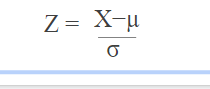
- Normalisation
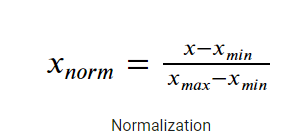
1. methods : (MinMaxScaler or Mean Normalization)

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)

In [103]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [104]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        
    else:
        cm=cm
        

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
def metric(y_test,y_pred,x_train,y_train,model):
    test_acc = accuracy_score(y_test,y_pred)
    train_acc = model.score(x_train,y_train)
    precision=precision_score(y_test,y_pred,average='macro')
    recall =recall_score(y_test,y_pred,average='macro')
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    F1_score = f1_score(y_test,y_pred,average='macro')
    print('test accuracy score : ',test_acc,"%")
    print('train accuracy score : ',train_acc,"%")
    print('precision score : ',precision,"%")
    print('recall score : ',recall,"%")
    print('Mean Squared Error : ',mse,"%")
    print('Mean Absolute Error : ',mae,"%")
    print('F_1 score : ',f1_score,"%")
    
    print("classification report")
    print(classification_report(y_test,y_pred))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    fig1 = plt.figure(figsize=(7,6))
    plot_confusion_matrix(conf_mat, classes=y.value_counts().index.tolist(), title='Confusion matrix')
    return test_acc,train_acc,precision,recall,mse,mae,F1_score

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score,classification_report,mean_absolute_error,f1_score
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100 , random_state=42).fit(x_train,y_train)

rf_prediction = rf.predict(x_test)


test accuracy score :  0.8761622992392223 %
train accuracy score :  1.0 %
precision score :  0.8880998657438055 %
recall score :  0.8761641963935177 %
Mean Squared Error :  0.49535080304311074 %
Mean Absolute Error :  0.24767540152155537 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      2958
           1       0.81      0.93      0.87      2958
           2       0.83      0.99      0.90      2957
           3       0.92      0.78      0.84      2957

    accuracy                           0.88     11830
   macro avg       0.89      0.88      0.88     11830
weighted avg       0.89      0.88      0.88     11830

Confusion Matrix


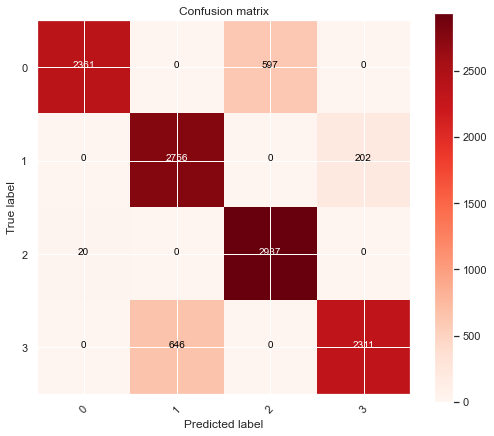

In [107]:
test_acc_rf,train_acc_rf,precision_rf,recall_rf,mse_rf,mae_rf,f1_score_rf = metric(y_test,rf_prediction,x_train,y_train,rf)


In [109]:

model_result = pd.DataFrame({'test accuracy':test_acc_rf , 'train accuarcy':train_acc_rf,
                            'precision score':precision_rf , 
                            'recall score':recall_rf,
                            'mse':mse_rf,
                            'mae':mae_rf,
                            'F_1 score':f1_score_rf}  , index=['Rf_normal'])
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.0,0.8881,0.876164,0.495351,0.247675,0.875255


### Variable Importances

In [110]:
importances = rf.feature_importances_.tolist()
feature_list = x.columns.tolist()
features_importances = [(feature , round(importance,2))for feature , importance in zip(feature_list,importances)]
features_importances = sorted(features_importances,key=lambda x : x[1] , reverse=True)#
#[print('Feature : {:20}Importances : {}'.format(*n)) for n in features_importances]
for n in features_importances:
    print('Feature : {:20}Importances : {}'.format(*n))

Feature : isClosed            Importances : 0.21
Feature : Age Day             Importances : 0.11
Feature : founded_at          Importances : 0.08
Feature : funding_total_usd   Importances : 0.08
Feature : last_funding_at     Importances : 0.07
Feature : relationships       Importances : 0.07
Feature : first_funding_at    Importances : 0.06
Feature : first_milestone_at  Importances : 0.05
Feature : last_milestone_at   Importances : 0.05
Feature : milestones          Importances : 0.05
Feature : lng                 Importances : 0.04
Feature : funding_rounds      Importances : 0.03
Feature : lat                 Importances : 0.03
Feature : state_code          Importances : 0.02
Feature : investment_rounds   Importances : 0.01
Feature : cluster             Importances : 0.01
Feature : other               Importances : 0.01
Feature : software            Importances : 0.01
Feature : other               Importances : 0.01
Feature : advertising         Importances : 0.0
Feature : analytics  

The feature is selected is :  ['isClosed', 'Age Day', 'founded_at', 'funding_total_usd', 'last_funding_at', 'relationships', 'first_funding_at', 'first_milestone_at', 'last_milestone_at', 'milestones']
shape of new x train is :  (47318, 10)
shape of new x test is :  (11830, 10)
test accuracy score :  0.8761622992392223 %
train accuracy score :  0.9929202417684602 %
precision score :  0.8880998657438055 %
recall score :  0.8761641963935177 %
Mean Squared Error :  0.49535080304311074 %
Mean Absolute Error :  0.24767540152155537 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      2958
           1       0.81      0.93      0.87      2958
           2       0.83      0.99      0.90      2957
           3       0.92      0.78      0.84      2957

    accuracy                           0.88     11830
   macro avg       0.89      0.88      0.88     11830
weighte

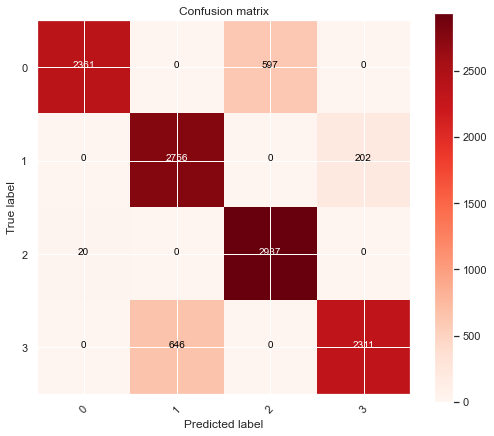

In [111]:
rf_most_important = RandomForestClassifier(n_estimators=100,random_state=42)
#Extracted most important feature 10 
important_feature = [n for n,imp in features_importances if imp >=0.05]
print("The feature is selected is : ",important_feature)
#read x-train and x-test before scale
x_train_dataframe = pd.read_csv('final/Final_x-train_dataframe_before_scaler.csv')
x_test_dataframe = pd.read_csv('final/Final_x-test_dataframe_before_scaler.csv')

#slice to specifics columns 
x_train_most_important = x_train_dataframe.loc[:,important_feature]
x_test_most_important = x_test_dataframe.loc[:,important_feature]

#Shape of new x train and new y train 
print("shape of new x train is : ",x_train_most_important.shape)
print("shape of new x test is : ",x_test_most_important.shape)

#Scale 
x_train_most_important = scaler.fit_transform(x_train_most_important)
x_test_most_important = scaler.fit_transform(x_test_most_important)

#fit model
rf_most_important.fit(x_train_most_important,y_train)
#make predicttion
rf_most_important_prediction = rf_most_important.predict(x_test_most_important)

test_acc_Imp,train_acc_Imp,precision_Imp,recall_Imp,mse_Imp,mae_Imp,f1_score_Imp = metric(y_test,rf_prediction,x_train_most_important,y_train,rf_most_important)

In [112]:
rf_2_dataframe = pd.DataFrame({'test accuracy':test_acc_Imp , 'train accuarcy':train_acc_Imp,
                            'precision score':precision_Imp , 
                            'recall score':recall_Imp,
                            'mse':mse_Imp,
                            'mae':mae_Imp,
                            'F_1 score':f1_score_Imp}  , index=['Rf_important_features'])
model_result = pd.concat([model_result,rf_2_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.00000,0.8881,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.99292,0.8881,0.876164,0.495351,0.247675,0.875255


### Random Search with Cross Validation

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [114]:
#rf_most_important #['accuracy','recall','precision','f1_macro'], scoring= 'neg_mean_absolute_error', n_jobs=4
rf_randomCV = RandomizedSearchCV(estimator=rf_most_important , param_distributions=random_grid,
                                n_iter=10 ,n_jobs=-1,
                                cv=3,verbose=2,random_state=42,
                                return_train_score=True)
rf_randomCV.fit(x_train_most_important[:2000],y_train[:2000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=2)

In [115]:
rf_randomCV.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [116]:
rf_randomCV.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [117]:
result_cv = pd.DataFrame(data=rf_randomCV.cv_results_)
result_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.789555,0.004772,0.045213,0.001244,200,10,2,sqrt,50,True,...,0.242879,0.258258,0.255002,0.008873,1,0.952738,0.952738,0.961019,0.955499,0.003904
1,3.266265,0.344854,0.139626,0.002154,600,10,4,sqrt,90,False,...,0.233883,0.253754,0.246004,0.008681,6,0.964741,0.965491,0.968516,0.966249,0.001632
2,3.900901,0.390663,0.155251,0.007825,600,2,2,auto,60,False,...,0.232384,0.262763,0.247508,0.012403,4,0.996249,0.997749,0.998501,0.997500,0.000936
3,6.768232,0.495793,0.356048,0.026122,1400,5,1,sqrt,30,True,...,0.235382,0.258258,0.248505,0.009638,3,0.995499,0.996999,0.995502,0.996000,0.000706
4,6.098025,0.317284,0.240357,0.001629,1000,10,1,auto,80,False,...,0.224888,0.250751,0.241005,0.011480,9,0.987247,0.986497,0.990255,0.987999,0.001624
5,2.307163,0.124467,0.094084,0.000469,400,10,1,sqrt,60,False,...,0.226387,0.253754,0.245504,0.013560,7,0.986497,0.986497,0.989505,0.987499,0.001418
6,10.384228,0.187011,0.377657,0.012359,2000,2,2,auto,50,False,...,0.232384,0.249249,0.244003,0.008229,8,0.995499,0.997749,0.998501,0.997250,0.001275
7,0.687827,0.003672,0.041223,0.000940,200,5,2,sqrt,10,True,...,0.217391,0.253754,0.237508,0.015095,10,0.929482,0.912228,0.925037,0.922249,0.007315
8,4.450098,0.040167,0.248668,0.007021,1200,2,4,auto,100,True,...,0.223388,0.265766,0.247009,0.017639,5,0.954239,0.948987,0.949025,0.950750,0.002467
9,7.409517,0.032638,0.373334,0.018681,2000,5,2,auto,50,True,...,0.224888,0.270270,0.248511,0.018574,2,0.993248,0.990998,0.991004,0.991750,0.001059


In [118]:
#result_cv.to_csv('final/randomCV_result.csv')

In [121]:
rf_randomCV_prediction = rf_randomCV.predict(x_test_most_important)

test accuracy score :  0.2510566356720203 %
train accuracy score :  0.2807176972822182 %
precision score :  0.2509865898930458 %
recall score :  0.2510631880940311 %
Mean Squared Error :  2.3759087066779374 %
Mean Absolute Error :  1.2156382079459003 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.25      0.22      0.24      2958
           1       0.26      0.21      0.23      2958
           2       0.25      0.37      0.30      2957
           3       0.24      0.21      0.22      2957

    accuracy                           0.25     11830
   macro avg       0.25      0.25      0.25     11830
weighted avg       0.25      0.25      0.25     11830

Confusion Matrix


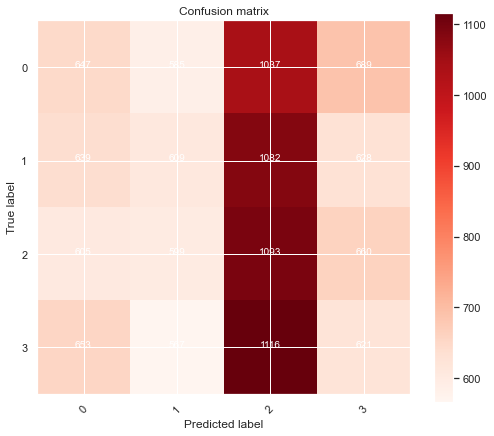

In [122]:
test_acc_Random,train_acc_Random,precision_Random,recall_Imp,mse_Random,mae_Random,f1_score_Random = metric(y_test,rf_randomCV_prediction,x_train_most_important,y_train,rf_randomCV)

In [123]:
rf_3_dataframe = pd.DataFrame({'test accuracy':test_acc_Random , 'train accuarcy':train_acc_Random,
                            'precision score':precision_Random , 
                            'recall score':recall_Imp,
                            'mse':mse_Random,
                            'mae':mae_Random,
                            'F_1 score':f1_score_Random}  , index=['Rf_RandomSearch_important_features'])
model_result = pd.concat([model_result,rf_3_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968


In [124]:
rf_randomCV_origin = RandomizedSearchCV(estimator=RandomForestClassifier() , param_distributions=random_grid,
                                n_iter=10 , n_jobs=-1,
                                cv=3,verbose=2,random_state=42,
                                return_train_score=True)
rf_randomCV_origin.fit(x_train[:2000],y_train[:2000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=2)

In [125]:
rf_randomCV_origin.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [126]:
result_cv_origin = pd.DataFrame(data=rf_randomCV_origin.cv_results_)
result_cv_origin

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.772268,0.054701,0.049534,0.002860,200,10,2,sqrt,50,True,...,0.832084,0.837838,0.832503,0.004196,8,0.962491,0.965491,0.964768,0.96425,0.001279
1,2.048521,0.082736,0.126994,0.001881,600,10,4,sqrt,90,False,...,0.835082,0.837838,0.836501,0.001126,6,0.978995,0.978995,0.979760,0.97925,0.000361
2,2.486350,0.236618,0.132645,0.001410,600,2,2,auto,60,False,...,0.841079,0.834835,0.836999,0.002887,5,0.999250,0.999250,1.000000,0.99950,0.000354
3,4.806146,0.274280,0.322803,0.015798,1400,5,1,sqrt,30,True,...,0.838081,0.846847,0.840003,0.004991,3,0.996999,0.998500,0.997751,0.99775,0.000613
4,4.287200,0.068820,0.245344,0.031040,1000,10,1,auto,80,False,...,0.853073,0.852853,0.848502,0.006309,1,0.996999,0.998500,0.997751,0.99775,0.000613
5,1.583431,0.016314,0.089760,0.001411,400,10,1,sqrt,60,False,...,0.839580,0.843844,0.838503,0.004861,4,0.996999,0.998500,0.997001,0.99750,0.000707
6,7.075743,0.198302,0.335104,0.006664,2000,2,2,auto,50,False,...,0.841079,0.848348,0.841004,0.006028,2,0.999250,0.999250,1.000000,0.99950,0.000354
7,0.649929,0.032269,0.053523,0.007388,200,5,2,sqrt,10,True,...,0.838081,0.827327,0.828999,0.006836,9,0.961740,0.961740,0.964018,0.96250,0.001074
8,3.445119,0.009507,0.233376,0.003550,1200,2,4,auto,100,True,...,0.826087,0.828829,0.826001,0.002344,10,0.948987,0.944486,0.949025,0.94750,0.002131
9,5.310797,0.097881,0.281911,0.007566,2000,5,2,auto,50,True,...,0.841079,0.825826,0.832996,0.006261,7,0.984996,0.990248,0.988006,0.98775,0.002151


In [127]:
#result_cv_origin.to_csv('final/randomCV_result_origin.csv')

In [128]:
y_pred_origin_rs = rf_randomCV_origin.predict(x_test)

test accuracy score :  0.8272189349112427 %
train accuracy score :  0.8608986009552391 %
precision score :  0.8351458651183731 %
recall score :  0.8272171578974085 %
Mean Squared Error :  0.6911242603550296 %
Mean Absolute Error :  0.3455621301775148 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2958
           1       0.71      0.84      0.77      2958
           2       0.86      0.98      0.91      2957
           3       0.80      0.66      0.72      2957

    accuracy                           0.83     11830
   macro avg       0.84      0.83      0.83     11830
weighted avg       0.84      0.83      0.83     11830

Confusion Matrix


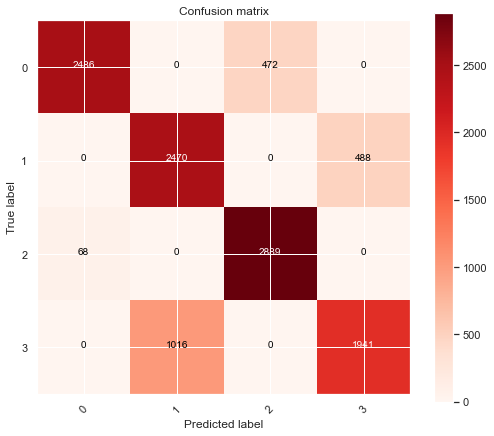

In [129]:
test_acc_Random_org,train_acc_Random_org,precision_Random_org,recall_Imp_org,mse_Random_org,mae_Random_org,f1_score_Random_org = metric(y_test,y_pred_origin_rs,x_train,y_train,rf_randomCV_origin)

In [130]:
rf_4_dataframe = pd.DataFrame({'test accuracy':test_acc_Random_org , 'train accuarcy':train_acc_Random_org,
                            'precision score':precision_Random_org , 
                            'recall score':recall_Imp_org,
                            'mse':mse_Random_org,
                            'mae':mae_Random_org,
                            'F_1 score':f1_score_Random_org}  , index=['Rf_RandomSearch_origin'])
model_result = pd.concat([model_result,rf_4_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981


In [131]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
} #, n_jobs = -1
grid_search = GridSearchCV(estimator = rf_most_important, param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=True,n_jobs=-1)
grid_search.fit(x_train_most_important[:2000], y_train[:2000])

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [132]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [133]:
grid_search_cv = pd.DataFrame(data=grid_search.cv_results_)
grid_search_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.324798,0.008197,0.023271,0.000470,True,80,2,3,8,100,...,0.251874,0.267267,0.255506,0.008517,9,0.943736,0.942986,0.950525,0.945749,0.003391
1,0.635633,0.002617,0.046542,0.000471,True,80,2,3,8,200,...,0.248876,0.255255,0.252002,0.002606,65,0.949737,0.950488,0.955772,0.951999,0.002685
2,1.112358,0.112206,0.076130,0.008476,True,80,2,3,8,300,...,0.244378,0.256757,0.247005,0.007136,173,0.952738,0.951238,0.960270,0.954749,0.003952
3,3.672056,0.299678,0.231713,0.008932,True,80,2,3,8,1000,...,0.242879,0.262763,0.253005,0.008122,45,0.957989,0.957989,0.957271,0.957750,0.000339
4,0.341088,0.019543,0.025598,0.003761,True,80,2,3,10,100,...,0.233883,0.271772,0.252510,0.015475,57,0.930983,0.929482,0.925037,0.928501,0.002524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3.609558,0.032083,0.168882,0.012465,True,110,3,5,10,1000,...,0.238381,0.264264,0.251506,0.010570,81,0.918980,0.918980,0.925037,0.920999,0.002856
284,0.389292,0.006582,0.024269,0.000470,True,110,3,5,12,100,...,0.244378,0.259760,0.251504,0.006330,89,0.888972,0.873218,0.889805,0.883999,0.007630
285,0.768279,0.007566,0.046874,0.000814,True,110,3,5,12,200,...,0.235382,0.250751,0.245003,0.006846,217,0.899475,0.892723,0.908546,0.900248,0.006483
286,1.150922,0.002936,0.072473,0.001695,True,110,3,5,12,300,...,0.232384,0.255255,0.247004,0.010367,177,0.902476,0.894224,0.913043,0.903248,0.007703


In [134]:
#grid_search_cv.to_csv("final/grid_search_cv.csv")

In [135]:
grid_search_prediction = grid_search.predict(x_test_most_important)


test accuracy score :  0.25266272189349115 %
train accuracy score :  0.2807176972822182 %
precision score :  0.25297631680181654 %
recall score :  0.25267003178074376 %
Mean Squared Error :  2.406508875739645 %
Mean Absolute Error :  1.221555367709214 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.25      0.23      0.24      2958
           1       0.25      0.19      0.22      2958
           2       0.25      0.35      0.29      2957
           3       0.25      0.24      0.25      2957

    accuracy                           0.25     11830
   macro avg       0.25      0.25      0.25     11830
weighted avg       0.25      0.25      0.25     11830

Confusion Matrix


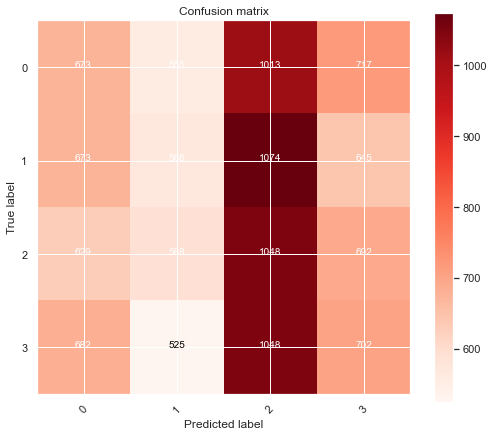

In [136]:
test_acc_grid,train_acc_grid,precision_grid,recagrid,mse_grid,mae_grid,f1_score_grid = metric(y_test,grid_search_prediction,x_train_most_important,y_train,grid_search)

In [137]:
rf_4_dataframe = pd.DataFrame({'test accuracy':test_acc_grid , 'train accuarcy':train_acc_grid,
                            'precision score':precision_grid , 
                            'recall score':recagrid,
                            'mse':mse_grid,
                            'mae':mae_grid,
                            'F_1 score':f1_score_grid}  , index=['Rf_GridSearch_important_features'])
model_result = pd.concat([model_result,rf_4_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981
Rf_GridSearch_important_features,0.252663,0.280718,0.252976,0.252670,2.406509,1.221555,0.249264


In [138]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=True, n_jobs=-1)
grid_search.fit(x_train[:1000], y_train[:1000])

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [139]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [140]:
grid_search_cv_origin = pd.DataFrame(data=grid_search.cv_results_)
grid_search_cv_origin

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.180183,0.004976,0.016955,1.946680e-07,True,80,2,3,8,100,...,0.792793,0.801802,0.791013,0.009619,275,0.932432,0.913043,0.922039,0.922505,0.007922
1,0.369010,0.007852,0.032580,4.703589e-04,True,80,2,3,8,200,...,0.819820,0.807808,0.803022,0.016031,159,0.920420,0.919040,0.917541,0.919001,0.001176
2,0.568812,0.027978,0.056848,9.872590e-03,True,80,2,3,8,300,...,0.816817,0.825826,0.809025,0.017775,45,0.926426,0.928036,0.926537,0.927000,0.000734
3,1.913217,0.065106,0.165224,2.350558e-03,True,80,2,3,8,1000,...,0.813814,0.819820,0.807020,0.014071,83,0.930931,0.931034,0.925037,0.929001,0.002803
4,0.191820,0.007389,0.016290,4.699655e-04,True,80,2,3,10,100,...,0.834835,0.810811,0.805036,0.026999,102,0.914414,0.908546,0.902549,0.908503,0.004844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1.819134,0.014407,0.116356,8.318108e-03,True,110,3,5,10,1000,...,0.816817,0.813814,0.805021,0.014610,115,0.908408,0.898051,0.902549,0.903003,0.004241
284,0.211767,0.008933,0.020279,1.880424e-03,True,110,3,5,12,100,...,0.816817,0.798799,0.795026,0.019516,257,0.890390,0.892054,0.901049,0.894498,0.004682
285,0.448134,0.015818,0.037566,1.880873e-03,True,110,3,5,12,200,...,0.810811,0.813814,0.804017,0.011796,143,0.903904,0.899550,0.893553,0.899002,0.004243
286,0.640952,0.014575,0.052194,9.401557e-04,True,110,3,5,12,300,...,0.819820,0.813814,0.803028,0.019654,154,0.899399,0.902549,0.893553,0.898500,0.003727


In [141]:
#grid_search_cv_origin.to_csv("final/grid_search_cv_origin.csv")

In [142]:
grid_search_prediction_origin = grid_search.predict(x_test)


test accuracy score :  0.797971259509721 %
train accuracy score :  0.8138551925271567 %
precision score :  0.807761262003137 %
recall score :  0.7979657088541806 %
Mean Squared Error :  0.8131022823330516 %
Mean Absolute Error :  0.40431107354184276 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2958
           1       0.67      0.84      0.75      2958
           2       0.84      0.95      0.89      2957
           3       0.80      0.58      0.67      2957

    accuracy                           0.80     11830
   macro avg       0.81      0.80      0.79     11830
weighted avg       0.81      0.80      0.79     11830

Confusion Matrix


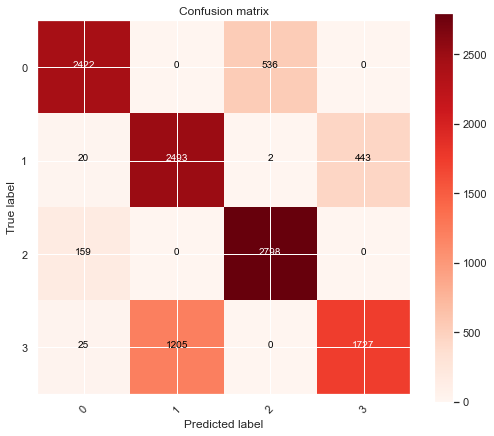

In [143]:
test_acc_grid_org,train_acc_grid_org,precision_grid_org,recagrid_org,mse_grid_org,mae_grid_org,f1_score_grid_org = metric(y_test,grid_search_prediction_origin,x_train,y_train,grid_search)

In [144]:
rf_5_dataframe = pd.DataFrame({'test accuracy':test_acc_grid_org , 'train accuarcy':train_acc_grid_org,
                            'precision score':precision_grid_org , 
                            'recall score':recagrid_org,
                            'mse':mse_grid_org,
                            'mae':mae_grid_org,
                            'F_1 score':f1_score_grid_org}  , index=['Rf_GridSearch_Normal'])
model_result = pd.concat([model_result,rf_5_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981
Rf_GridSearch_important_features,0.252663,0.280718,0.252976,0.252670,2.406509,1.221555,0.249264
Rf_GridSearch_Normal,0.797971,0.813855,0.807761,0.797966,0.813102,0.404311,0.794877


test accuracy score :  0.8873203719357565 %
train accuracy score :  1.0 %
precision score :  0.8963969331948713 %
recall score :  0.8873218692629058 %
Mean Squared Error :  0.4507185122569738 %
Mean Absolute Error :  0.2253592561284869 %
F_1 score :  <function f1_score at 0x000001BBA41189D0> %
classification report
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2958
           1       0.82      0.93      0.88      2958
           2       0.85      0.99      0.91      2957
           3       0.92      0.80      0.86      2957

    accuracy                           0.89     11830
   macro avg       0.90      0.89      0.89     11830
weighted avg       0.90      0.89      0.89     11830

Confusion Matrix


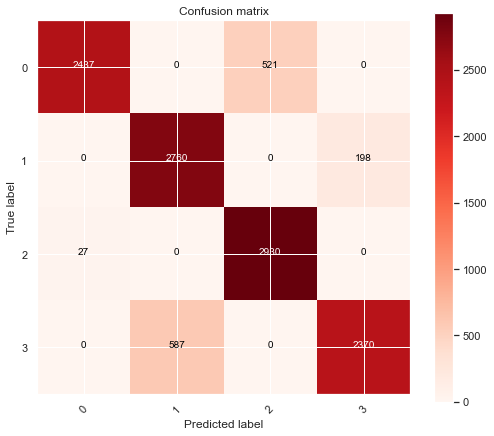

In [145]:
rf_normal = RandomForestClassifier().fit(x_train , y_train)
rf_prediction_normal =rf_normal.predict(x_test)
test_acc_normal,train_acc_normal,precision_normal,recanormal,mse_normal,mae_normal,f1_score_normal = metric(y_test,rf_prediction_normal,x_train,y_train,rf_normal)

In [146]:
rf_6_dataframe = pd.DataFrame({'test accuracy':test_acc_normal , 'train accuarcy':train_acc_normal,
                            'precision score':precision_normal , 
                            'recall score':recanormal,
                            'mse':mse_normal,
                            'mae':mae_normal,
                            'F_1 score':f1_score_normal}  , index=['Rf_Optimze_default'])
model_result = pd.concat([model_result,rf_6_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981
Rf_GridSearch_important_features,0.252663,0.280718,0.252976,0.252670,2.406509,1.221555,0.249264
Rf_GridSearch_Normal,0.797971,0.813855,0.807761,0.797966,0.813102,0.404311,0.794877
Rf_Optimze_default,0.887320,1.000000,0.896397,0.887322,0.450719,0.225359,0.886707


In [147]:
from sklearn.model_selection import KFold

number_estimator = [70]
max_depth = [13,15,17]
max_leaf_nodes = [20,25,30]
min_samples_split = [15,20]

parameters = {'n_estimators':number_estimator , 'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes,
              'min_samples_split': min_samples_split}
kf = KFold(n_splits = 5 , shuffle = True , random_state = 0)
clf_GS = GridSearchCV(RandomForestClassifier(), parameters, cv=5,n_jobs=1)
clf_GS.fit(x_train[0:1000], y_train[0:1000])
print(clf_GS.best_params_)

{'max_depth': 13, 'max_leaf_nodes': 30, 'min_samples_split': 20, 'n_estimators': 70}


In [148]:
clf_kf = RandomForestClassifier( max_depth=15, random_state=0)


In [149]:
from sklearn.model_selection import  cross_val_score
cv_results = cross_val_score(
    clf_kf, x, y, cv=kf, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.934) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] END ................................ score: (test=0.937) total time=   5.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


[CV] END ................................ score: (test=0.935) total time=   5.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.2s remaining:    0.0s


[CV] END ................................ score: (test=0.930) total time=   5.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.6s remaining:    0.0s


[CV] END ................................ score: (test=0.933) total time=   5.4s
0.9337593005198693 0.0022980010690286648


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.1s finished


In [180]:
import seaborn as sns
from typing import Tuple
import copy as cp
def cross_val_predict_2(model, kfold: KFold, X: np.array, y: np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)

    no_classes = len(np.unique(y))

    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes])

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(
            predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(
                predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros(
                (len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba


In [181]:
actual_classes, predicted_classes, _ = cross_val_predict_2(
    clf_kf, kf, x.to_numpy(), y.to_numpy())

In [152]:
recal = recall_score(actual_classes, predicted_classes, average='weighted')
recal

0.9337593832420369

In [153]:
from sklearn.metrics import  f1_score
f1 = f1_score(actual_classes , predicted_classes , average = 'weighted' )
f1

0.9337580384182186

In [154]:
from sklearn.metrics import precision_recall_fscore_support

support = precision_recall_fscore_support(actual_classes,predicted_classes,average='weighted')
support

(0.9337775245022214, 0.9337593832420369, 0.9337580384182186, None)

In [155]:
mse = mean_squared_error(actual_classes,predicted_classes)
mse

0.2649624670318523

In [156]:
mae = mean_absolute_error(actual_classes,predicted_classes)
mae

0.13248123351592614

In [157]:
test_acc = accuracy_score(actual_classes,predicted_classes)
test_acc

0.9337593832420369

In [158]:
report = classification_report(actual_classes,predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14787
           1       0.89      0.88      0.88     14787
           2       0.98      0.98      0.98     14787
           3       0.88      0.89      0.89     14787

    accuracy                           0.93     59148
   macro avg       0.93      0.93      0.93     59148
weighted avg       0.93      0.93      0.93     59148



In [159]:
rf_7_dataframe = pd.DataFrame({'test accuracy':test_acc , 'train accuarcy':1,
                            'precision score':support[0] , 
                            'recall score':support[1],
                            'mse':mse,
                            'mae':mae,
                            'F_1 score':support[2]}  , index=['Rf_Grid_search_KFold_origin'])
model_result = pd.concat([model_result,rf_7_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981
Rf_GridSearch_important_features,0.252663,0.280718,0.252976,0.252670,2.406509,1.221555,0.249264
Rf_GridSearch_Normal,0.797971,0.813855,0.807761,0.797966,0.813102,0.404311,0.794877
Rf_Optimze_default,0.887320,1.000000,0.896397,0.887322,0.450719,0.225359,0.886707
Rf_Grid_search_KFold_origin,0.933759,1.000000,0.933778,0.933759,0.264962,0.132481,0.933758


In [177]:
from sklearn.model_selection import cross_validate, cross_val_predict #
cv_results_rf = cross_validate(RandomForestClassifier(), x, y, cv=kf, n_jobs=-1, return_train_score=True )
for k, v in cv_results_rf.items():
    print(f"{k} ---> {v}")

fit_time ---> [7.7  7.8  7.74 7.63 7.61]
score_time ---> [0.22 0.23 0.23 0.23 0.23]
test_score ---> [0.97 0.97 0.97 0.96 0.96]
train_score ---> [1. 1. 1. 1. 1.]


In [161]:
cv_results_rf['train_score'].mean()

1.0

In [162]:
cv_results_rf['test_score'].mean()

0.9693990190761868

In [163]:
cross_val_score(RandomForestClassifier(), x, y, cv=10, n_jobs=-1)

array([0.91, 0.97, 0.98, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98])

In [164]:
cross_val_score(RandomForestClassifier(), x, y, cv=10, n_jobs=-1).mean()

0.96934834630264

In [183]:
y_pred = cross_val_predict(RandomForestClassifier(), x, y, cv=10, n_jobs=-1)
len(y_pred)

59148

In [184]:
y_pred

array([0, 1, 0, ..., 3, 3, 3], dtype=int64)

In [ ]:
mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score,classification_report,mean_absolute_error,f1_score

In [188]:
acc_test = accuracy_score(y, y_pred)
precision = precision_score(y,y_pred,average='macro')
recall = recall_score(y,y_pred,average='macro')
f1_scores = f1_score(y,y_pred,average='macro')
mse_2 = mean_squared_error(y,y_pred)
mae_2 =mean_absolute_error(y,y_pred)
train_acc = cv_results_rf['train_score'].mean()

In [192]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14787
           1       0.95      0.95      0.95     14787
           2       0.99      0.98      0.99     14787
           3       0.95      0.95      0.95     14787

    accuracy                           0.97     59148
   macro avg       0.97      0.97      0.97     59148
weighted avg       0.97      0.97      0.97     59148



Confusion Matrix


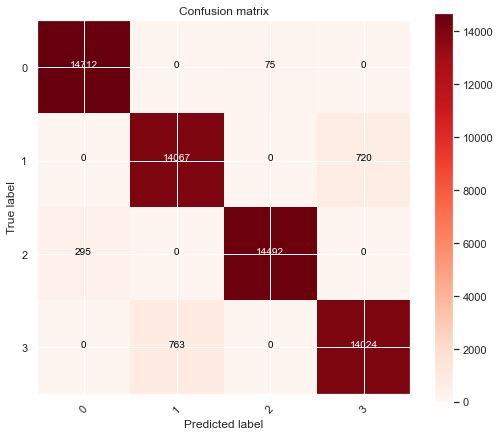

In [193]:
print("Confusion Matrix")
conf_mat = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=y.value_counts().index.tolist(), title='Confusion matrix')

In [189]:
rf_8_dataframe = pd.DataFrame({'test accuracy':acc_test , 'train accuarcy':train_acc,
                            'precision score':precision , 
                            'recall score':recall,
                            'mse':mse_2,
                            'mae':mae_2,
                            'F_1 score':f1_scores}  , index=['cross_validation_Rf'])
model_result = pd.concat([model_result,rf_8_dataframe],axis=0)
model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
Rf_normal,0.876162,1.000000,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_important_features,0.876162,0.992920,0.888100,0.876164,0.495351,0.247675,0.875255
Rf_RandomSearch_important_features,0.251057,0.280718,0.250987,0.251063,2.375909,1.215638,0.246968
Rf_RandomSearch_origin,0.827219,0.860899,0.835146,0.827217,0.691124,0.345562,0.825981
Rf_GridSearch_important_features,0.252663,0.280718,0.252976,0.252670,2.406509,1.221555,0.249264
Rf_GridSearch_Normal,0.797971,0.813855,0.807761,0.797966,0.813102,0.404311,0.794877
Rf_Optimze_default,0.887320,1.000000,0.896397,0.887322,0.450719,0.225359,0.886707
Rf_Grid_search_KFold_origin,0.933759,1.000000,0.933778,0.933759,0.264962,0.132481,0.933758
cross_validation_Rf,0.968672,1.000000,0.968728,0.968672,0.125313,0.062656,0.968671


In [190]:
model_result.to_csv('final/models_result_rf.csv')